In [82]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
df = pd.read_csv("fact_sp.csv", encoding="latin1")
df.head()


Taux_Distribution_Theme  \
0 19455628925752941 1208                        1   
  20051538089869539 1245                     5833   
  19455628925752941 1208                     2131   
  19922692865195679 1237                     5927   
  20051538089869539 1245                     2129   

                          Nombre_Distribution_par_Theme  fk_RNA_ID  \
0 19455628925752941 1208                              1        9.0   
  20051538089869539 1245                           5833        NaN   
  19455628925752941 1208                           2131        NaN   
  19922692865195679 1237                           5927        NaN   
  20051538089869539 1245                           2129      385.0   

                          fk_Theme_id  fk_Geographie_Id       fk_Time_id  \
0 19455628925752941 1208            1                13  300000000000001   
  20051538089869539 1245         3930                13  300000000000001   
  19455628925752941 1208         2131                13  300000000000001   
  19922692865195679 1237          174                13  300000000000001   
  20051538089869539 1245          783                13  300000000000001   

                          Taux de pauvreté (en %)  \
0 19455628925752941 1208                       20   
  20051538089869539 1245                       20   
  19455628925752941 1208                       20   
  19922692865195679 1237                       20   
  20051538089869539 1245                       20   

                          Intensité de la pauvreté (en %)  
0 19455628925752941 1208                     2.000000e+14  
  20051538089869539 1245                     2.000000e+14  
  19455628925752941 1208                     2.000000e+14  
  19922692865195679 1237                     2.000000e+14  
  20051538089869539 1245                     2.000000e+14

In [84]:
columns_to_keep = [
    "Taux_Distribution_Theme",
    "Nombre_Distribution_par_Theme",
    "Taux de pauvreté (en %)",
    "Intensité de la pauvreté (en %)"
]

df = df[columns_to_keep]
df.head()


Taux_Distribution_Theme  \
0 19455628925752941 1208                        1   
  20051538089869539 1245                     5833   
  19455628925752941 1208                     2131   
  19922692865195679 1237                     5927   
  20051538089869539 1245                     2129   

                          Nombre_Distribution_par_Theme  \
0 19455628925752941 1208                              1   
  20051538089869539 1245                           5833   
  19455628925752941 1208                           2131   
  19922692865195679 1237                           5927   
  20051538089869539 1245                           2129   

                          Taux de pauvreté (en %)  \
0 19455628925752941 1208                       20   
  20051538089869539 1245                       20   
  19455628925752941 1208                       20   
  19922692865195679 1237                       20   
  20051538089869539 1245                       20   

                          Intensité de la pauvreté (en %)  
0 19455628925752941 1208                     2.000000e+14  
  20051538089869539 1245                     2.000000e+14  
  19455628925752941 1208                     2.000000e+14  
  19922692865195679 1237                     2.000000e+14  
  20051538089869539 1245                     2.000000e+14

In [85]:
for col in df.columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

# Remplacer les valeurs manquantes par la médiane
df = df.fillna(df.median())

df.isnull().sum()


,0
Taux_Distribution_Theme,0
Nombre_Distribution_par_Theme,0
Taux de pauvreté (en %),0
Intensité de la pauvreté (en %),0


In [86]:
df["log_Nombre_Distribution"] = np.log1p(df["Nombre_Distribution_par_Theme"])


In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[
    [
        "Taux_Distribution_scaled",
        "Nombre_Distribution_scaled",
        "Taux_pauvrete_scaled",
        "Intensite_pauvrete_scaled"
    ]
] = scaler.fit_transform(
    df[
        [
            "Taux_Distribution_Theme",
            "log_Nombre_Distribution",
            "Taux de pauvreté (en %)",
            "Intensité de la pauvreté (en %)"
        ]
    ]
)

df["ImpactScore_Need"] = (
    df[
        [
            "Taux_Distribution_scaled",
            "Nombre_Distribution_scaled",
            "Taux_pauvrete_scaled",
            "Intensite_pauvrete_scaled"
        ]
    ].mean(axis=1)
)

df[["ImpactScore_Need"]].head()


ImpactScore_Need
0 19455628925752941 1208          0.239583
  20051538089869539 1245          0.722500
  19455628925752941 1208          0.542120
  19922692865195679 1237          0.726782
  20051538089869539 1245          0.542010

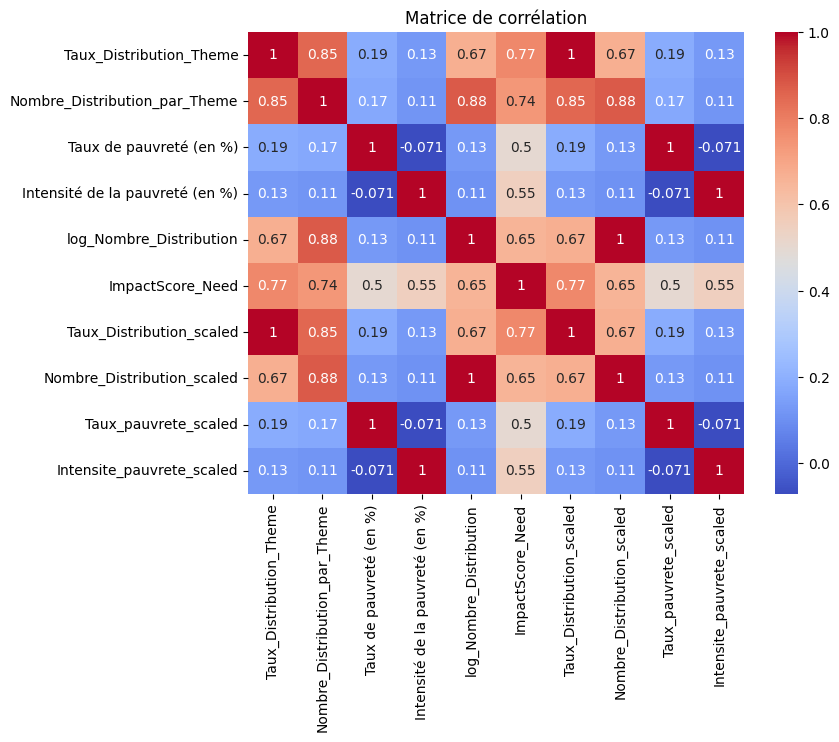

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [95]:
X = df[
    [
        "Taux_Distribution_Theme",
        "log_Nombre_Distribution",
        "Taux de pauvreté (en %)",
        "Intensité de la pauvreté (en %)"
    ]
]

y = df["ImpactScore_Need"]


In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [97]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [98]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("R² :", r2)


RMSE : 0.06807899867120441
R² : 0.7897918932694281


In [99]:
coefficients = pd.DataFrame(
    {
        "Feature": X.columns,
        "Coefficient": model.coef_
    }
)

coefficients


,Feature,Coefficient
0,Taux_Distribution_Theme,5.935132e-05
1,log_Nombre_Distribution,2.381724e-08
2,Taux de pauvreté (en %),2.838087e-08
3,Intensité de la pauvreté (en %),2.907682e-16
